In [297]:
#import libraries
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('stopwords')



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cerenkasap/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cerenkasap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [298]:
df=pd.read_csv('./financial-sentiment-analysis/data.csv', error_bad_lines = False, index_col=False)

/Users/cerenkasap/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [300]:
df["Sentiment"].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

<AxesSubplot:>

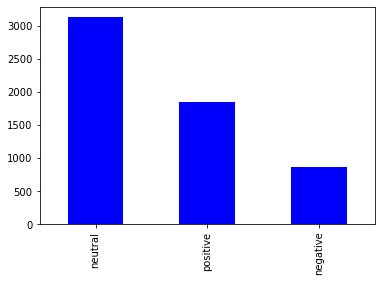

In [301]:
df["Sentiment"].value_counts().plot(kind = "bar", color = "b")


In [302]:
df["Sentiment"].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [303]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [304]:
#Text Cleaning
def Text_Cleaning(Text):    
    # Lowercase the texts
    Text = Text.lower()

    # Cleaning punctuations in the text
    punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    Text = Text.translate(punc)

    # Removing numbers in the text
    Text = re.sub(r'\d+', '', Text)

    # Remove possible links
    Text = re.sub('https?://\S+|www\.\S+', '', Text)

    # Deleting newlines
    Text = re.sub('\n', '', Text)

    return Text

#Text Preprocessing
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):    
    Processed_Text = list()
    Lemmatizer = WordNetLemmatizer()

    # Tokens of Words
    Tokens = nltk.word_tokenize(Text)

    # Removing Stopwords and Lemmatizing Words
    # To reduce noises in our dataset, also to keep it simple and still 
    # powerful, we will only omit the word `not` from the list of stopwords

    for word in Tokens:
        if word not in Stopwords:            
            Processed_Text.append(Lemmatizer.lemmatize(word))            
    return(" ".join(Processed_Text))

In [305]:
#Apply the functions
df['Sentence'] = df['Sentence'].apply(Text_Cleaning).apply(Text_Processing)


In [306]:
df

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low bk real possibility,negative
2,last quarter componenta net sale doubled eurm ...,positive
3,according finnish russian chamber commerce maj...,neutral
4,swedish buyout firm sold remaining percent sta...,neutral
...,...,...
5837,rising cost forced packaging producer huhtamak...,negative
5838,nordic walking first used summer training meth...,neutral
5839,according shipping company viking line eu deci...,neutral
5840,building home improvement trade sale decreased...,neutral


In [307]:
df.to_csv('financial_data_cleaned.csv', index=False)